In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

pd.set_option('display.max_rows', None)

# data files used in this notebook are saved in Data/food survey_Wales-is-region_dv-10/

In [462]:
labels_dict = pd.read_excel(
            'Data/food survey_Wales-is-region_dv-10/withGuide_Food+and+You+Waves+1-5+Data+User+Guide.xlsx',
            'Variables')

# Create a dictionary of names
labels_dict = pd.Series(labels_dict.Label.values, index=labels_dict.Variable).to_dict()
#OR: dict(zip(labels_dict.Variable, labels_dict.Label))

labels_dict

{'SerialNo': 'Serial Number',
 'RespSex': 'Gender',
 'age_dv': '(D) Age of respondent in bands: W4-5',
 'bhhsize2': '(D) Household size (4 categories)',
 'below6': '(D) Children under 6 in household',
 'below16': '(D) Children under 16 in household',
 'marstat2': '(D) Marital status',
 'hhdinc': '(D) Household income',
 'workstat2': '(D) Working Status (3 categories)',
 'region_dv': '(D) Region',
 'religion_dv': '(D) Religion',
 'wimd_2014_quintile': 'Wales - WIMD 2015 - Overall rank - QUINTILE',
 'nimd_2010_quintile': 'Northern Ireland - NIMD 2010 - QUINTILE',
 'nimd2017_quintile': 'Northern Ireland - NIMD 2017 - Overall rank - QUINTILE',
 'UrbanRuralInd': '(D) Net Urban-Rural Classification',
 'surveyyear': '(D) Survey Year',
 'country_dv': '(D) Country',
 'psu_dv': 'primary sample unit',
 'stratum_all_dv': 'Strata',
 'combinedW1_5weight': '(D) Combined all countries calibration weight core+boost+extra (scaled to countries %)',
 'countryW1_5weight': '(D) Combined all countries calibr

In [463]:
data = pd.read_csv('Data/food survey_Wales-is-region_dv-10/Food+and+You+Waves+1-5+Data (3).csv')

# Select Wales region (can consider analysing other regions too)
data_wales = data[data.region_dv.eq(10)]
data_wales = pd.DataFrame(data_wales)

# Focus on wave 5 (can considered other waves too)
wave = [5]
data_wales = data_wales.loc[data_wales['surveyyear'].isin(wave)]

# Encode 'Not applicable', 'Refused' and 'Don't know' as NaN
data_wales = data_wales.replace([-9, -8, -1, 98], np.nan)
cols = ['q4_1_4', 'q4_1_5a', 'Q4_1_5_comb', 'q4_1_6', 'q4_1_7', 'q4_1_8a', 'q4_1_8b', 'sanspray', 'q4_1_11',
        'q4_1_12', 'q4_1_13', 'q4_1_14', 'q4_1_15', 'q4_1_16', 'q4_1_17', 'q4_1_18', 'q4_1_19']
data_wales[cols] = data_wales[cols].replace([5], np.nan)

# To see hoy many non-NaNs values each column has
print(data_wales.count())

## Not advisable probably, but if we want to exclude those columns that are all NaNs:
# data_wales = data_wales.dropna(axis='columns', how='all')

#To see the full column name, instead of the label (using the dictionary labels_dict)
data_wales = data_wales.rename (columns = labels_dict)

data_wales.shape
data_wales

SerialNo              540
RespSex               540
age_dv                540
bhhsize2              540
below6                540
below16               540
marstat2              539
hhdinc                410
workstat2             540
region_dv             540
religion_dv           537
wimd_2014_quintile    540
nimd_2010_quintile      0
nimd2017_quintile       0
UrbanRuralInd         540
surveyyear            540
country_dv            540
psu_dv                540
stratum_all_dv        540
combinedW1_5weight    540
countryW1_5weight     540
CkRes                 540
resfdprp              540
CkFreq                540
bcook3                540
dietary               540
fdreac_dv             540
reacalle              102
reacint               102
reaccoe               102
reacnoc               102
reacglu               102
reaclac               102
reaccow               102
reacfpi               102
reacoth               102
reacno                539
clinaller              21
clinint     

Serial Number  Gender  (D) Age of respondent in bands: W4-5  \
11478         500038       2                                     2   
11484         500059       1                                     5   
11486         500068       2                                     2   
11491         500088       2                                     7   
11500         500116       2                                     2   
11511         500156       2                                     6   
11522         500205       2                                     3   
11526         500235       2                                     6   
11534         500263       1                                     7   
11541         500296       1                                     7   
11551         500343       2                                     7   
11560         500393       2                                     2   
11585         500518       1                                     7   
11591         500551       1                                     4   
11593         500555       2                                     7   
11608         500627       1                                     5   
11618         500658       2                                     7   
11626         500694       1                                     7   
11627         500708       1                                     6   
11639         500750       2                                     5   
11640         500755       2                                     7   
11643         500761       2                                     5   
11646         500767       2                                     7   
11649         500773       2                                     3   
11663         500813       2                                     2   
11678         500897       1                                     6   
11683         500922       1                                     6   
11687         500952       2                                     7   
11690         500958       2                                     5   
11693         500974       2                                     5   
11698         500993       2                                     1   
11699         500994       2                                     7   
11700         501001       2                                     5   
11710         501042       1                                     4   
11712         501055       2                                     4   
11714         501060       2                                     6   
11716         501062       2                                     4   
11718         501072       1                                     3   
11719         501073       2                                     4   
11721         501083       1                                     6   
11724         501102       2                                     6   
11731         501127       2                                     4   
11738         501180       2                                     6   
11749         501233       2                                     6   
11753         501245       2                                     3   
11757         501264       1                                     7   
11770         501307       2                                     4   
11771         501312       2                                     2   
11772         501322       2                                     6   
11777         501341       1                                     2   
11792         501396       2                                     3   
11794         501401       2                                     4   
11799         501424       1                                     7   
11813         501506       1                                     6   
11825         501558       2                                     6   
11826         501563       2                                     5   
11831         501

In [468]:
# Mostly optional (and MinMaxScaler might not be the best approach)
x = data_wales.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_wales_scaled = pd.DataFrame(x_scaled)
# also: normalized_df=(df-df.min())/(df.max()-df.min())

# To see the column label, instead of the index
data_wales_scaled.columns = list(data.columns)

# To see the full column name, instead of the label (using the dictionary labels_dict)
data_wales_scaled = data_wales_scaled.rename (columns = labels_dict)

#data_wales.shape
data_wales_scaled.head()

# Ignore the red block that appears in Jupyter notebooks. It is just a common warning

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Serial Number  Gender  (D) Age of respondent in bands: W4-5  \
0       0.000000     1.0                              0.166667   
1       0.001451     0.0                              0.666667   
2       0.002073     1.0                              0.166667   
3       0.003455     1.0                              1.000000   
4       0.005390     1.0                              0.166667   

   (D) Household size (4 categories)  (D) Children under 6 in household  \
0                           1.000000                                0.0   
1                           0.333333                                1.0   
2                           0.333333                                0.0   
3                           0.000000                                1.0   
4                           0.666667                                0.0   

   (D) Children under 16 in household  (D) Marital status  \
0                                 0.0                 1.0   
1                                 1.0                 1.0   
2                                 0.0                 1.0   
3                                 1.0                 1.0   
4                                 0.0                 1.0   

   (D) Household income  (D) Working Status (3 categories)  (D) Region  ...  \
0              0.333333                                1.0         0.0  ...   
1              0.333333                                1.0         0.0  ...   
2              0.333333                                0.0         0.0  ...   
3              0.333333                                0.5         0.0  ...   
4              0.333333                                1.0         0.0  ...   

   In general, when buying or eating food, how often do you feel confident that it is what is says it is on the label or the menu?  \
0                                           0.666667                                                                                 
1                                           0.000000                                                                                 
2                                           0.333333                                                                                 
3                                           0.666667                                                                                 
4                                           0.000000                                                                                 

   Action taken as not confident that food was what it said it was: Tried to get more information about the issue  \
0                                                0.0                                                                
1                                                NaN                                                                
2                                                0.0                                                                
3                                                0.0                                                                
4                                                NaN                                                                

   Read about the issue when you saw it but did not seek out  \
0                                                0.0           
1                                                NaN           
2                                                0.0           
3                                                0.0           
4                                                NaN           

   Read food labels more carefully  Changed the way you cook food  \
0                              0.0                            0.0   
1                              NaN                            NaN   
2                              0.0                            0.0   
3                              1.0                            0.0   
4                              NaN                            NaN   

   Ch

In [469]:
# Optional (but only applicable after normalization/standarization)

#To see the column label, instead of the index
data_wales_scaled.columns = list(data.columns)

def find_variables_topic (chosen_topic, data): # chosen_topic must be a string (eg 'safediary')
    topic = [col for col in data.columns if chosen_topic in col]
    data[chosen_topic] = data[topic].sum(axis=1)
# Example:
    # meat = [col for col in data_wales_scaled.columns if 'safemeat' in col]
    # data_wales_scaled['safemeat'] = data_wales_scaled[meat].sum(axis=1)

find_variables_topic ('safe', data_wales_scaled)
find_variables_topic ('safemeat', data_wales_scaled)
find_variables_topic ('safedairy', data_wales_scaled)
find_variables_topic ('safeegg', data_wales_scaled)
find_variables_topic ('safecheese', data_wales_scaled)
find_variables_topic ('safefish', data_wales_scaled)

poison = ['bpoison', 'Q4_26b', 'Q4_28a']
data_wales_scaled['poison_all'] = data_wales_scaled[poison].sum(axis=1)
# mistake? poison_all = 1 most of the time

# To see the full column name, instead of the label (using the dictionary labels_dict)
data_wales_scaled = data_wales_scaled.rename (columns = labels_dict)

data_wales_scaled


Serial Number  Gender  (D) Age of respondent in bands: W4-5  \
0         0.000000     1.0                              0.166667   
1         0.001451     0.0                              0.666667   
2         0.002073     1.0                              0.166667   
3         0.003455     1.0                              1.000000   
4         0.005390     1.0                              0.166667   
5         0.008154     1.0                              0.833333   
6         0.011540     1.0                              0.333333   
7         0.013613     1.0                              0.833333   
8         0.015548     0.0                              1.000000   
9         0.017829     0.0                              1.000000   
10        0.021077     1.0                              1.000000   
11        0.024532     1.0                              0.166667   
12        0.033170     0.0                              1.000000   
13        0.035450     0.0                              0.500000   
14        0.035727     1.0                              1.000000   
15        0.040702     0.0                              0.666667   
16        0.042844     1.0                              1.000000   
17        0.045332     0.0                              1.000000   
18        0.046299     0.0                              0.833333   
19        0.049202     1.0                              0.666667   
20        0.049547     1.0                              1.000000   
21        0.049962     1.0                              0.666667   
22        0.050377     1.0                              1.000000   
23        0.050791     1.0                              0.333333   
24        0.053555     1.0                              0.166667   
25        0.059360     0.0                              0.833333   
26        0.061088     0.0                              0.833333   
27        0.063161     1.0                              1.000000   
28        0.063575     1.0                              0.666667   
29        0.064681     1.0                              0.666667   
30        0.065994     1.0                              0.000000   
31        0.066063     1.0                              1.000000   
32        0.066547     1.0                              0.666667   
33        0.069380     0.0                              0.500000   
34        0.070278     1.0                              0.500000   
35        0.070624     1.0                              0.833333   
36        0.070762     1.0                              0.500000   
37        0.071453     0.0                              0.333333   
38        0.071522     1.0                              0.500000   
39        0.072213     0.0                              0.833333   
40        0.073526     1.0                              0.833333   
41        0.075254     1.0                              0.500000   
42        0.078916     1.0                              0.833333   
43        0.082579     1.0                              0.833333   
44        0.083408     1.0                              0.333333   
45        0.084721     0.0                              1.000000   
46        0.087693     1.0                              0.500000   
47        0.088038     1.0                              0.166667   
48        0.088729     1.0                              0.833333   
49        0.090042     0.0                              0.166667   
50        0.093843     1.0                              0.333333   
51        0.094188     1.0                              0.500000   
52        0.095778     0.0                              1.000000   
53        0.101444     0.0                              0.833333   
54        0.105038     1.0                              0.833333   
55        0.105383     1.0                              0.666667   
56        0.106558     1.0                              1.000000   
57        0.107664     1.0                              1.000

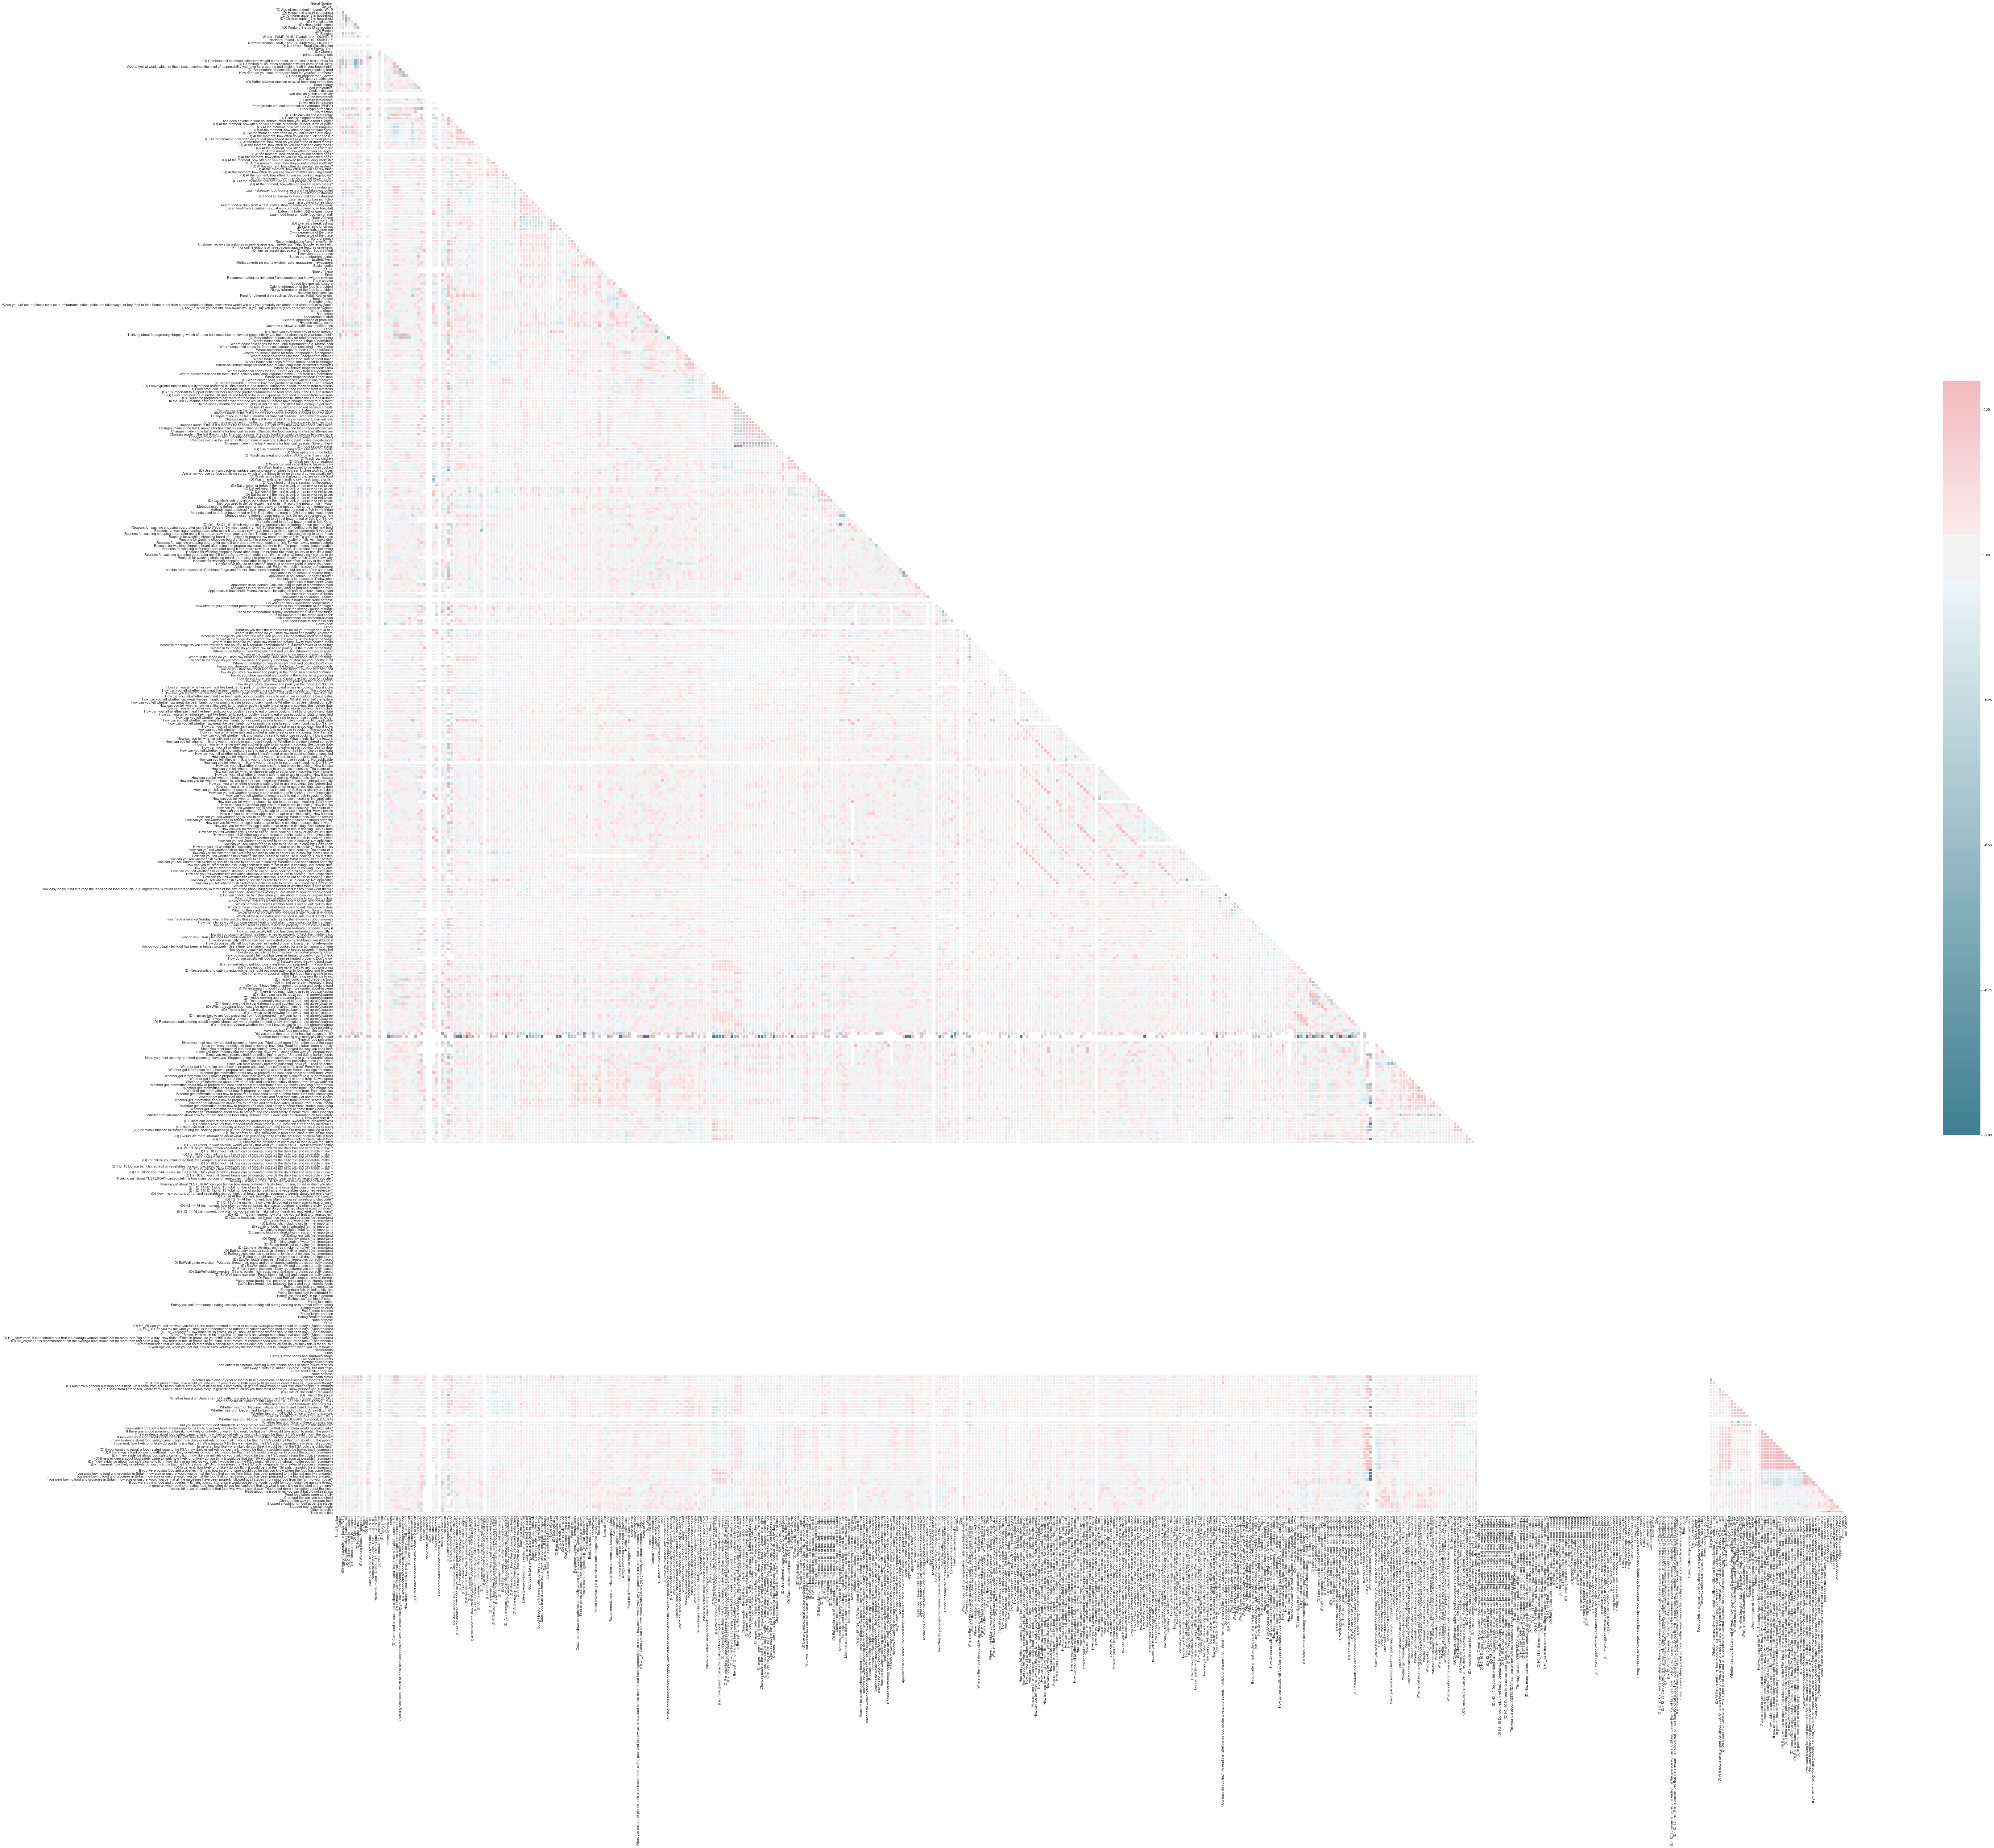

In [470]:
# Generate a plot showing correlation between all original variables

# Correlation matrix between all original variables
corr_matrix = data_wales.corr(method='spearman') # Could also use data_wales_scaled (including new grouped variables)
#print (corr_matrix)


sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(110, 90))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            xticklabels=True, yticklabels=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

f.savefig('corr_heatmap_wales_all_variables.png', format = 'png',  dpi = 300)


In [471]:
# Select features highly correlated with output variable

# Correlation  matrix between all variables
cor = data_wales.corr(method='spearman') # Could also use data_wales_scaled (including new grouped variables)

# Correlation with chosen output variable specifically
    # Posible output variables:
    # bpoison = (D) Whether had food poisoning
    # Q4_26b = Have you had food poisoning in the last year?
    # Q4_28a = Did you see a doctor or go to hospital because of it?
from sklearn.feature_selection import RFE
cor_target = cor['Have you had food poisoning in the last year?']

# Select features highly correlated (absolute correlation greater than 0.1)
relevant_features = cor_target[abs(cor_target)>0.1]

relevant_features.sort_values(ascending=False) # This ouput could be saved as a separate file


Have you had food poisoning in the last year?                                                                                                                                                        1.000000
Whether food poisoning was medically diagnosed                                                                                                                                                       0.500000
Did you see a doctor or go to hospital because of it?                                                                                                                                                0.397198
(D) If you wanted to report a food related issue to the FSA, how likely or unlikely do you think it would be that the problem would be looked into? (summary)                                        0.233107
If new evidence about food safety came to light, how likely or unlikely do you think it would be that the FSA would respond as soon as possible?                                

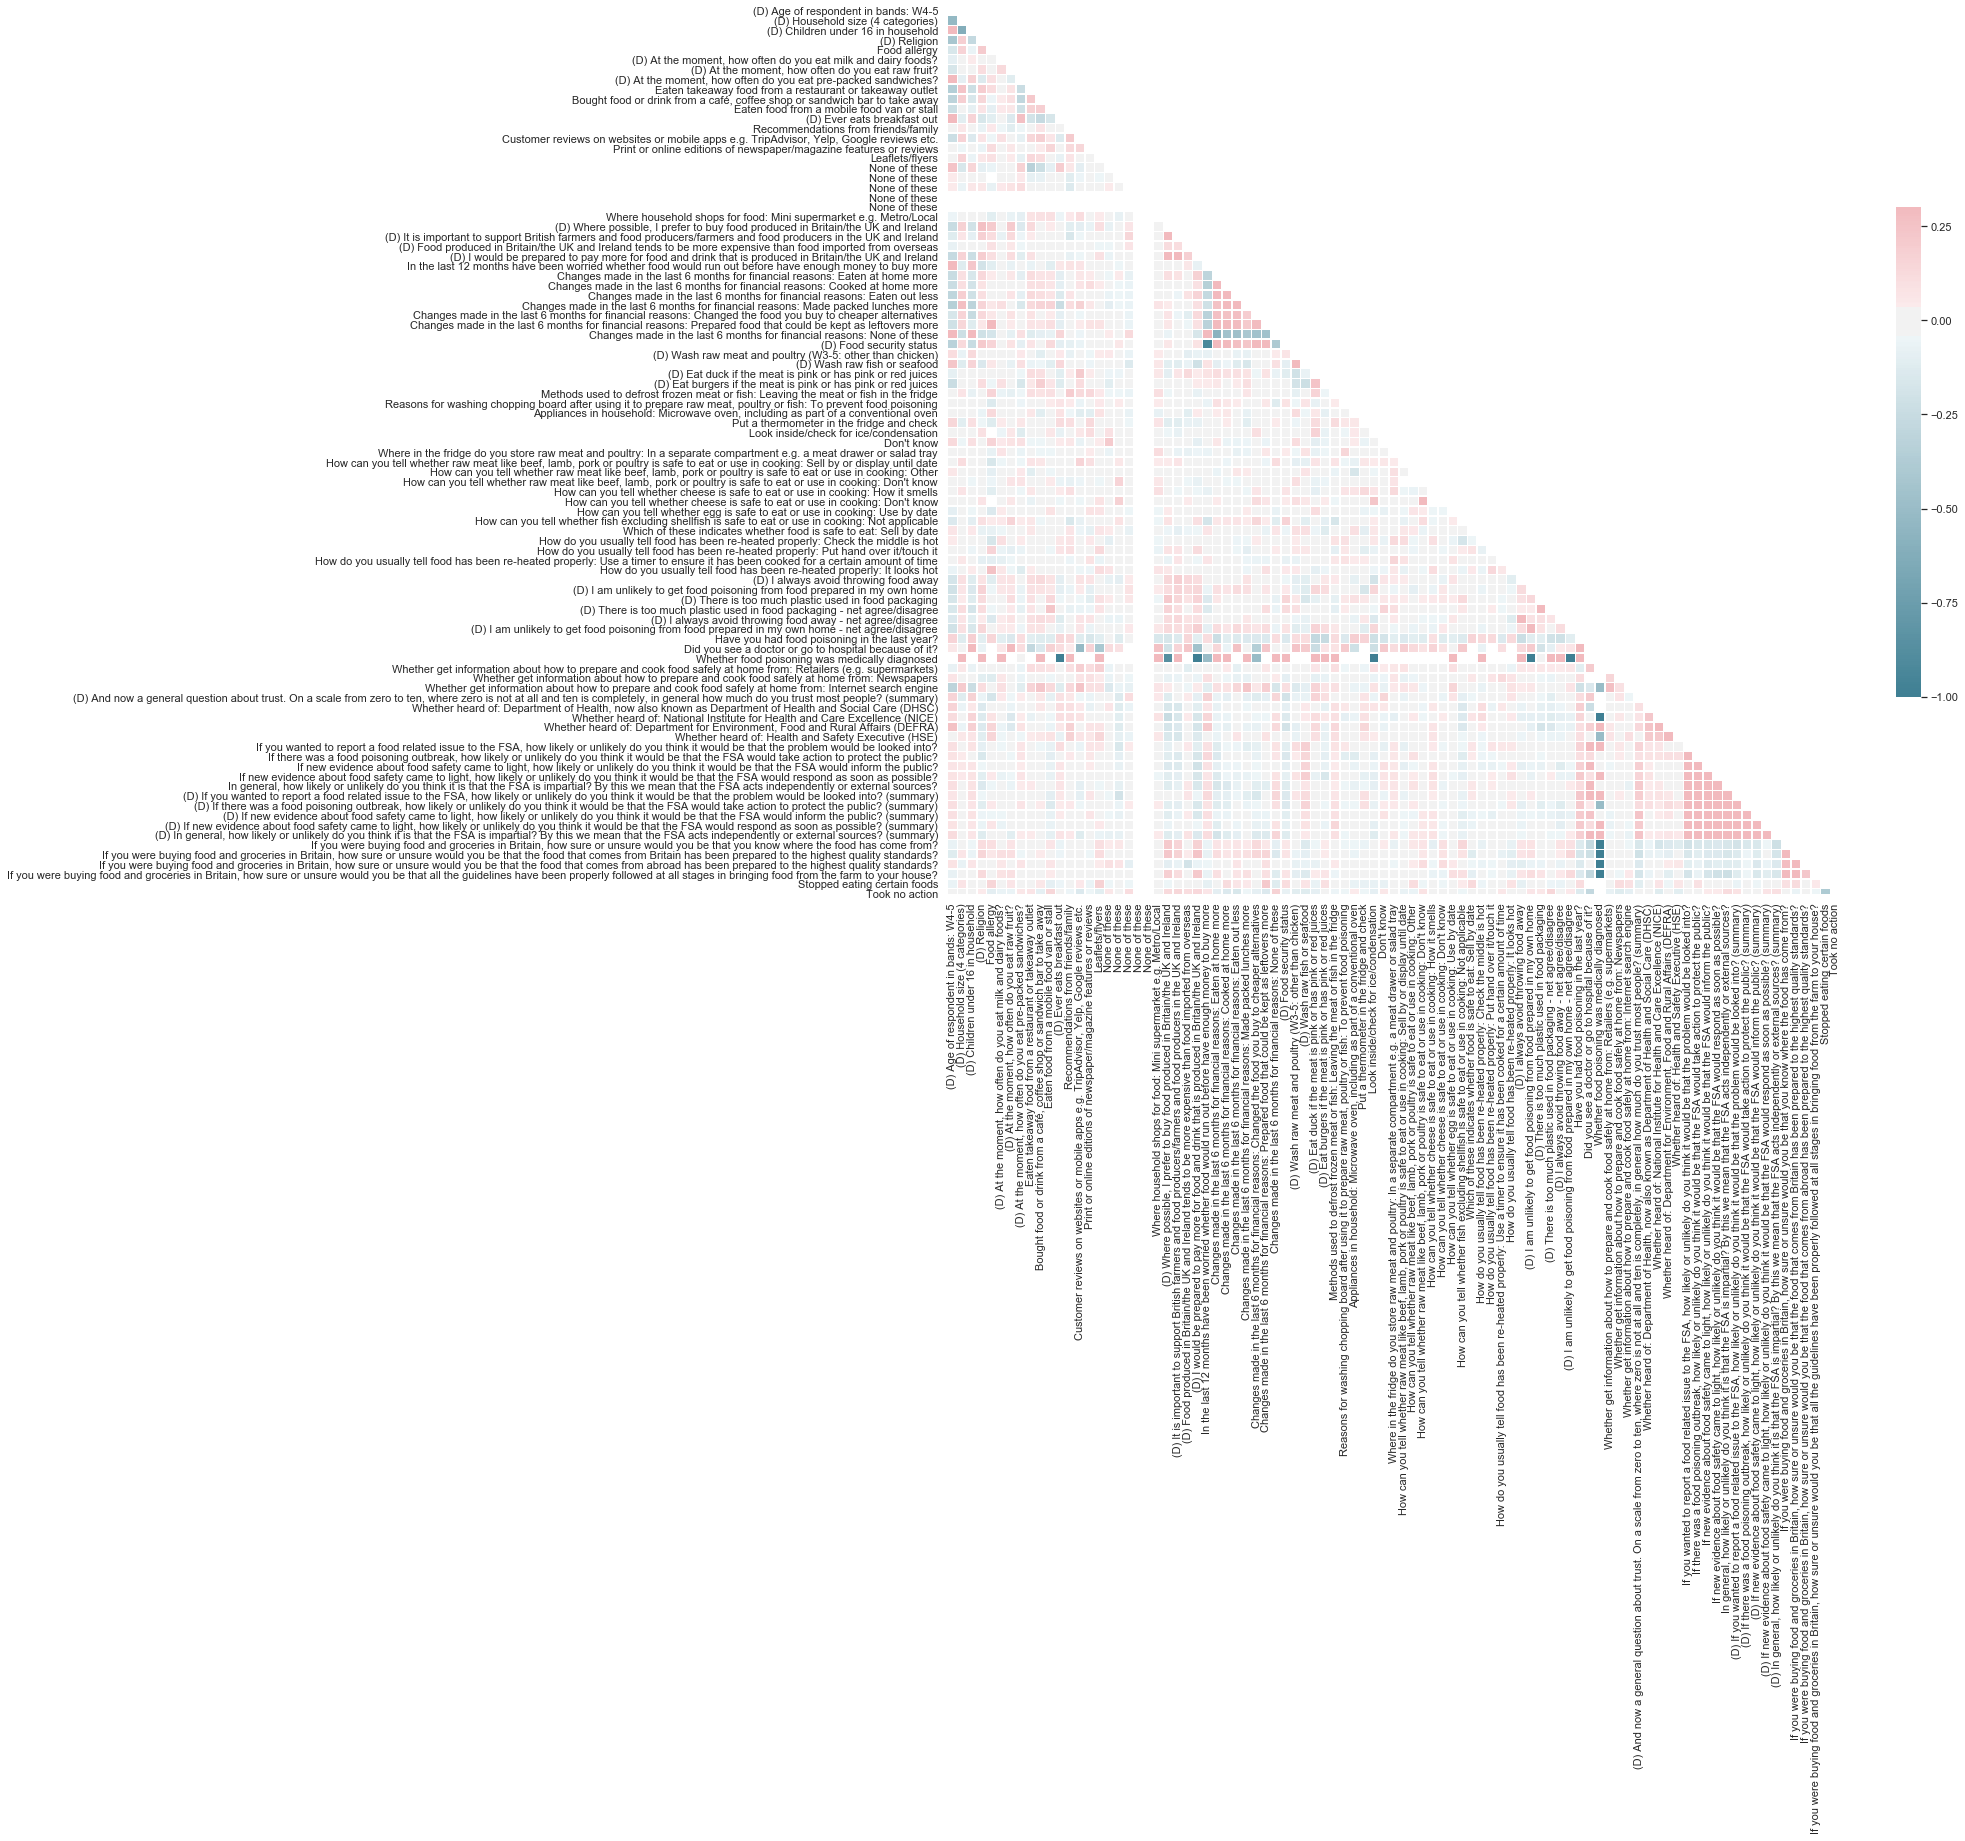

In [472]:
# Generate a plot showing correlation between features highly correlated with output variable

data_wales_correlated_target = data_wales[relevant_features.index]

# Correlation matrix between highly correlated variables
corr_matrix = data_wales_correlated_target.corr(method='spearman') # Could also do this using data_wales_scaled

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            xticklabels=True, yticklabels=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

f.savefig('corr_heatmap_wales_correlated_target.png', format = 'png',  dpi = 300)
